# ![alt text](logo.png) THE SPARKS FOUNDATION

# Task 3 : Exploratory Data Analysis - Retail

## Q) As a business manager, try to find out the weak areas where you can work to make more profit. and What all business problems you can derive by exploring the data?

## Author: Ravulakollu Narender <img src="profile.jpeg" alt="profile" width="200"/>

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the data set from locally saved
df = pd.read_csv("SampleSuperstore.csv")
print("Data import successfuly")

Data import successfuly


In [3]:
# see the first 5 records in the data set
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Cleaning and exploring the Data

In [4]:
# More Information about our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
# check the shape of given data
df.shape

(9994, 13)

In [6]:
# Describing the stats
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# check null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There is no null values in our data

In [8]:
# check the duplicate records
duplicate_rows = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows.shape)


number of duplicate rows:  (17, 13)


In [9]:
# drop the duplicate records
data = df.drop_duplicates().reset_index(drop=True)
data.tail()  # see last 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9972,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9973,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9974,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9975,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9976,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


## Exploratory Data Analysis

In [10]:
# check unique values in our columns
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**From above "Country" has only one value and "Postal Code" is not necessory for our analysis so we drop these columns**

In [11]:
data = data.drop(columns={'Country','Postal Code'},axis=1)
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
category_sales_profit = data.groupby('Category').sum()
display(category_sales_profit)

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,741306.3133,8020,368.59,18421.8137
Office Supplies,718735.2440,22861,946.20,122364.6608
Technology,836154.0330,6939,244.40,145454.9481


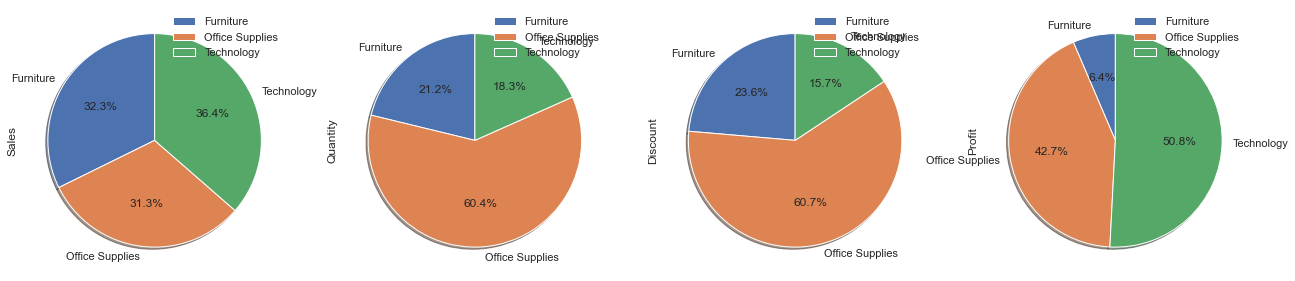

In [13]:
#Sales, Quantity, Discount and Profit of Categories
plt.style.use('seaborn-darkgrid')
category_sales_profit.plot.pie(shadow = True,startangle=90,subplots=True,figsize=(22, 10), autopct='%1.1f%%')
plt.show()

**From above : 
Total sales % by Technology is 36.4% and profit % is 50.8% 
Total sales % by Furniture is 32.3% and profit % is 6.4% 
Total sales % by Office Supplies is 31.3% and profit % is 42.7%**

In [14]:
Subcategory_sales_profit = data.groupby('Sub-Category').sum()
display(Subcategory_sales_profit)

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,167380.3180,2976,60.80,41936.6357
Appliances,107532.1610,1729,77.60,18138.0054
Art,27107.0320,2996,59.60,6524.6118
Binders,203409.1690,5971,566.20,30228.0003
Bookcases,114879.9963,868,48.14,-3472.5560
Chairs,327777.7610,2351,104.70,26567.1278
Copiers,149528.0300,234,11.00,55617.8249
Envelopes,16476.4020,906,20.40,6964.1767
Fasteners,3024.2800,914,17.80,949.5182


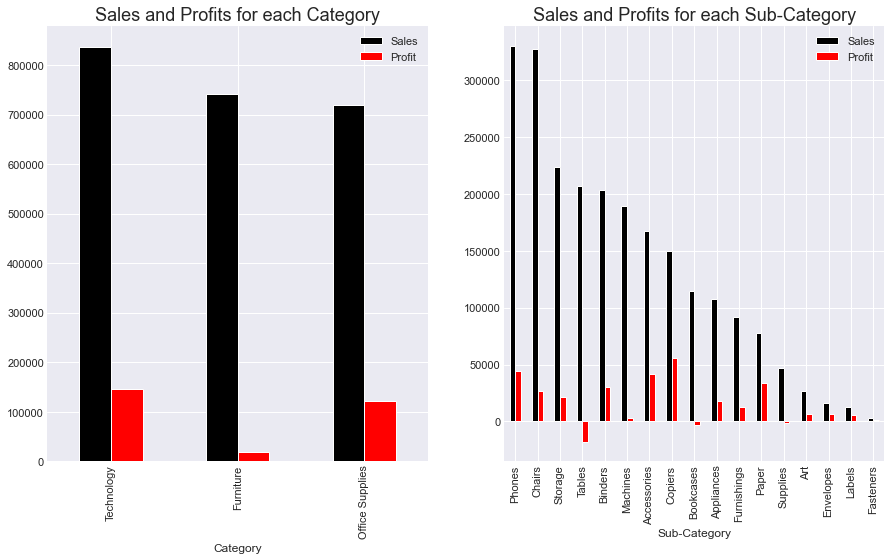

In [15]:
#Sales and Profits of Categories and Sub-Categories
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
data.groupby("Category")[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False).plot(kind="bar",color=["black","red"],ax=ax1)
ax1.set_title("Sales and Profits for each Category",size=18)
data.groupby("Sub-Category")[["Sales","Profit"]].sum().sort_values(by ="Sales",ascending=False).plot(kind ="bar",color=["black","red"],ax=ax2)
ax2.set_title("Sales and Profits for each Sub-Category",size=18)
plt.show()

**From plot 1 : 
The maximum profit is for category Technology with sales around 836K and the minimum Profit is for category Furniture with sales around 741K
From plot 2 : 
The maximum profit is for subcategory Copies with sales nearly 150K and the profit is negative for sub category Tables with sales nearly 206K**

In [16]:
Quantity_sales_profit = data.groupby('Quantity').sum()
display(Quantity_sales_profit)

,Sales,Discount,Profit
Quantity,,,
1,53251.9345,137.51,7440.4801
2,288786.7798,371.47,38450.6180
3,421514.1507,367.97,56928.7335
4,323516.8744,187.83,44152.3740
5,415661.6965,193.29,49516.5945
6,207122.3214,95.27,10325.4678
7,239908.3659,98.16,34286.9730
8,117760.1760,44.10,10856.7960
9,128505.5901,38.17,17687.8908


In [17]:
Segment_sales_profit=data.groupby('Segment').sum()
display(Segment_sales_profit)

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,1.160833e+06,19497,820.51,134007.4413
Corporate,7.060701e+05,11591,476.85,91954.9798
Home Office,4.292927e+05,6732,261.83,60279.0015


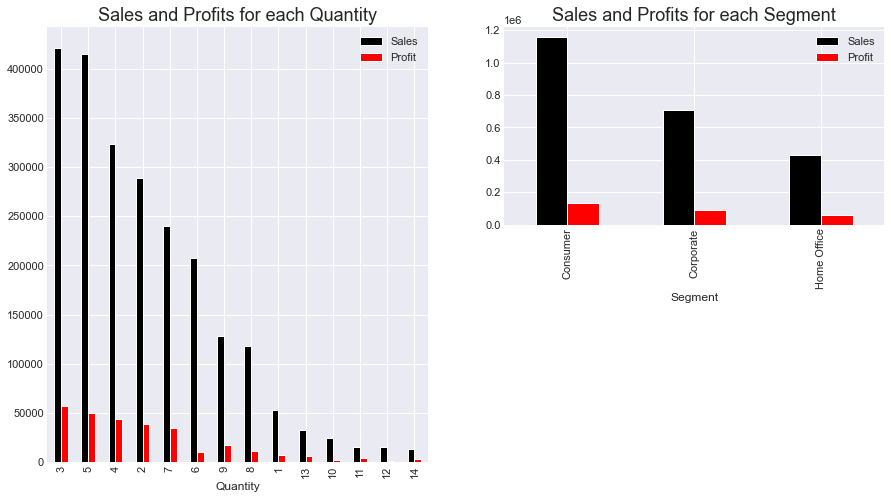

In [18]:
#Sales and Profits of each Quantity and each Segment
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(222)
data.groupby("Quantity")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black", "red"],ax=ax1)
ax1.set_title("Sales and Profits for each Quantity",size=18)
data.groupby("Segment")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black", "red"],ax=ax2)
ax2.set_title("Sales and Profits for each Segment",size=18)
plt.show()

**From plot 1 : 
The sales is maximum for lesser quantities and so is the profit.
From plot 2 : 
The maximum profit is for Segment consumer for maximum sales and the profit is minimum for segment Home office with minimum sales amongst the segment.**

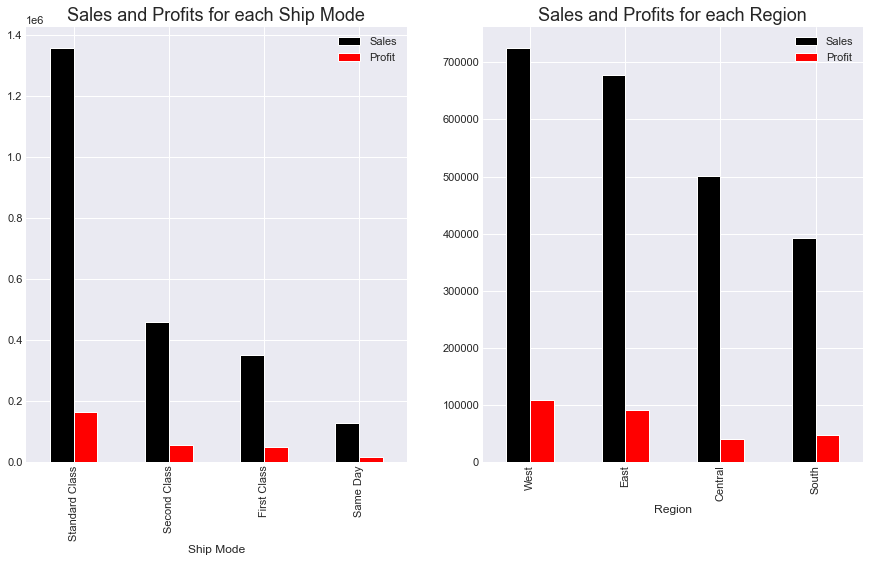

In [19]:
#Sales and Profits of each Ship Mode and each Region
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
data.groupby("Ship Mode")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black", "red"],ax=ax1)
ax1.set_title("Sales and Profits for each Ship Mode",size=18)
data.groupby("Region")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black", "red"],ax=ax2)
ax2.set_title("Sales and Profits for each Region",size=18)
plt.show()

**From plot 1 : 
The maximum sales is using the standard class Ship mode giving maximum profits.
From plot 2 : 
The maximum sales is more than 700K for the West region and Profit is maximum in this region. The minimum profit is present in the Cdentral region where sales is comparatively higher than the south region that has more profit that the central region**

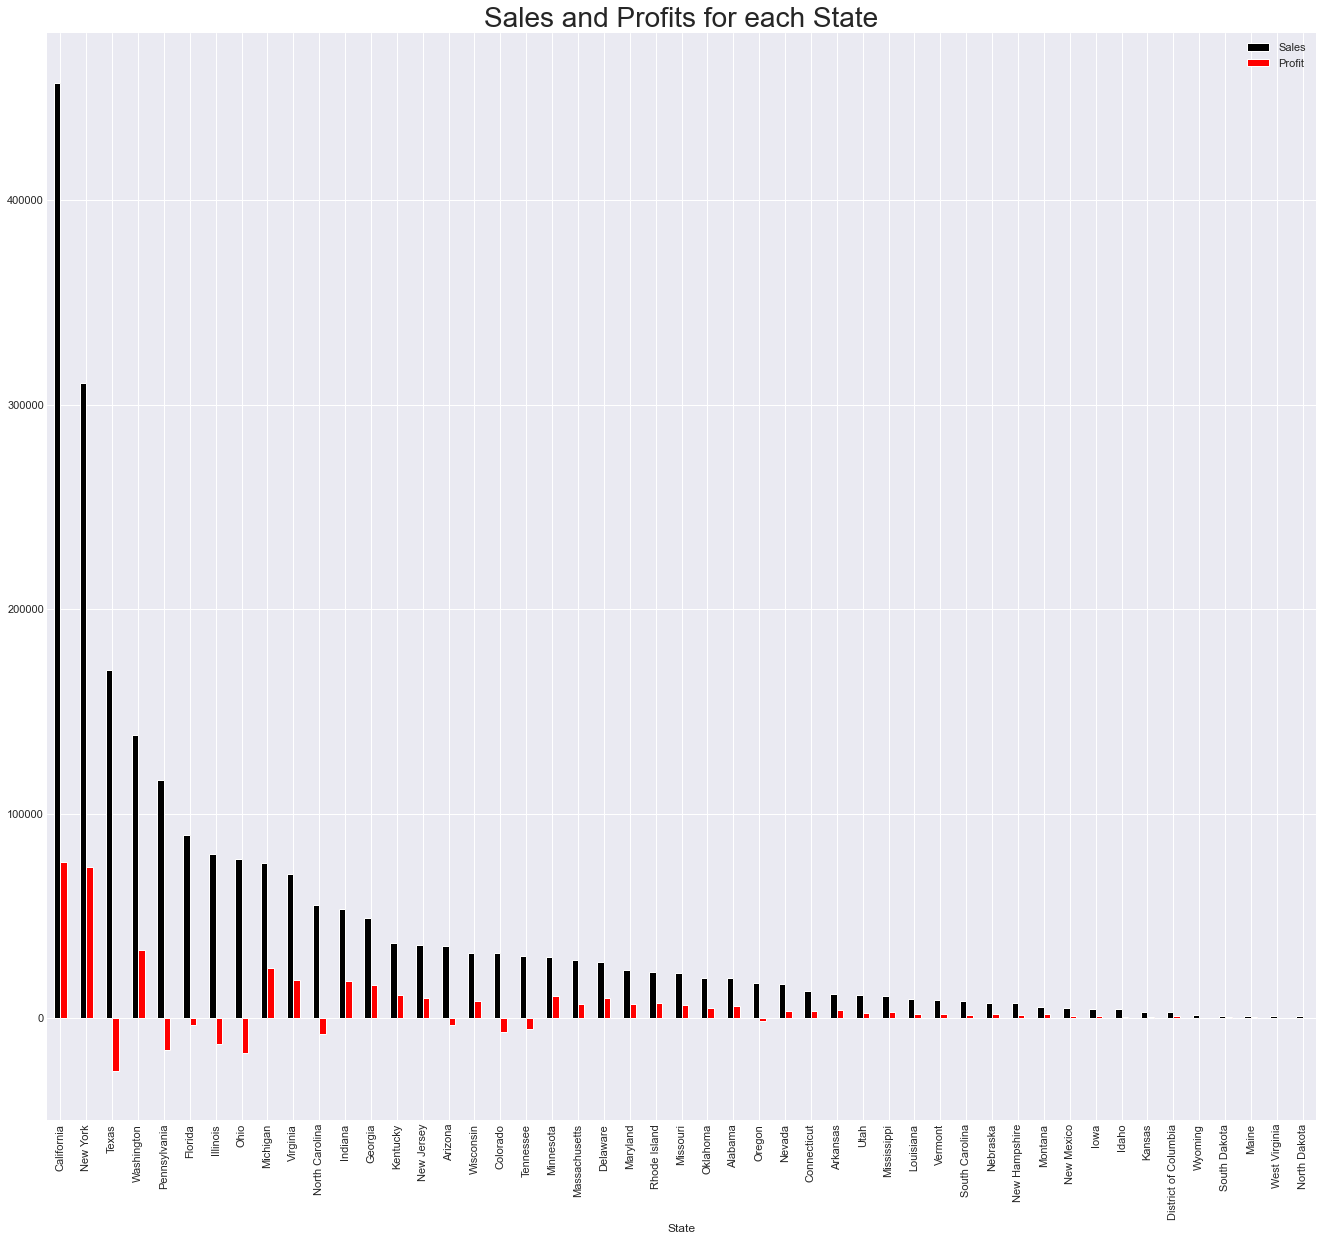

In [35]:
#Sales and Profits of each State
fig=plt.figure(figsize=(50,20))
ax1=fig.add_subplot(121)
data.groupby("State")[["Sales","Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black","red"],ax=ax1)
ax1.set_title("Sales and Profits for each State", size=28)
plt.show()

**From above :
for states including Texas,Pennsylvania, Florida, Illinois, Ohio, North Carolina and few other states have high sales with negative profits.**

In [22]:
#statewise discount
data.groupby("State").sum()['Discount'].sort_values(ascending = False)

State
Texas                   364.24
Pennsylvania            192.70
Illinois                191.10
Ohio                    152.10
California              145.60
Florida                 114.65
North Carolina           70.60
Arizona                  68.00
New York                 62.40
Colorado                 57.60
Tennessee                53.30
Oregon                   35.60
Washington               32.40
Utah                      3.20
Nevada                    2.40
New Mexico                2.20
Massachusetts             2.10
Michigan                  1.80
Idaho                     1.80
Rhode Island              1.20
Montana                   1.00
Maryland                  0.60
Delaware                  0.60
Connecticut               0.60
New Jersey                0.60
New Hampshire             0.30
West Virginia             0.30
Wyoming                   0.20
Nebraska                  0.00
South Dakota              0.00
Wisconsin                 0.00
Arkansas                  0.00
Di

### By comparing the barplot and the above dataframe, we can observe that the states that are offered high discounts are generating less profits¶

In [23]:
# data frame of statewise sales,profit,discount
states_data = data.groupby("State")[["Sales","Profit","Discount"]].sum().sort_values(by = "Sales", ascending = False)
states_data.head()

,Sales,Profit,Discount
State,,,
California,457576.2715,76330.7891,145.60
New York,310827.1510,74015.4622,62.40
Texas,170124.5418,-25750.9833,364.24
Washington,138560.8100,33368.2375,32.40
Pennsylvania,116496.3620,-15565.4035,192.70


In [24]:
#Discount with Negative Profit
states_data['Discount'][states_data['Profit'] < 0].sort_values(ascending = True)

State
Oregon             35.60
Tennessee          53.30
Colorado           57.60
Arizona            68.00
North Carolina     70.60
Florida           114.65
Ohio              152.10
Illinois          191.10
Pennsylvania      192.70
Texas             364.24
Name: Discount, dtype: float64

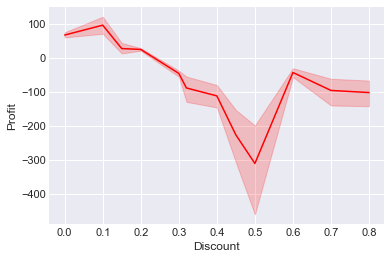

In [25]:
#line plot
sns.lineplot(x = "Discount", y = "Profit", data = data, color = "red")
plt.show()

**From above :
We can clearly observe that the discount has a negative relation with Profit i.e. as the discount is increasing the Profit generated is decreased.**

In [26]:
# Categorywise sales and profit and their counts
cat_data = data.groupby("Category")[["Sales","Profit"]].sum().sort_values(by = "Sales",ascending = False)
cat_data['value_counts'] = data['Category'].value_counts()
display(cat_data)

,Sales,Profit,value_counts
Category,,,
Technology,836154.0330,145454.9481,1847
Furniture,741306.3133,18421.8137,2118
Office Supplies,718735.2440,122364.6608,6012


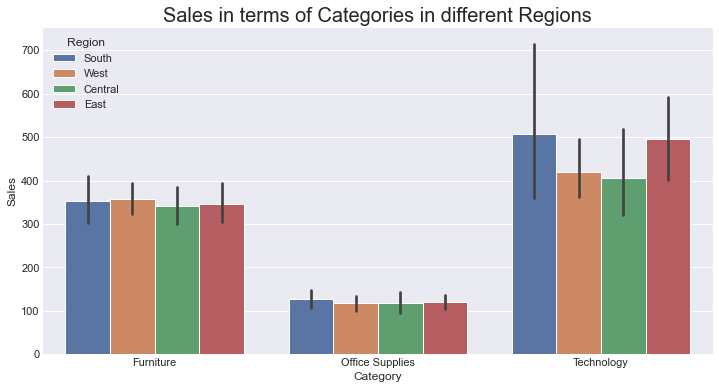

In [27]:
#Sales in terms of Categories in different Regions
plt.figure(figsize=(12,6))
sns.barplot(x='Category',y='Sales',hue='Region',data=data)
plt.title("Sales in terms of Categories in different Regions",size=20)
plt.show()

**From Above :
-The sales of "Furniture" is done maximum in Western Region nearly about 360k+, 
-after that, the sales of "Office Supplies" is maximum done in South region nearly about 150k+ 
-and the sales of "Technology" is maximum done in South Region nearly about 550k+. 
-Among all the three Category, the sale of Technology is Max and also Maximum Sales is done in South region.**

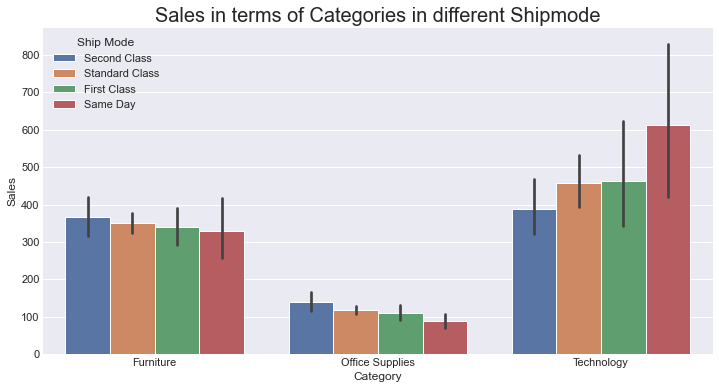

In [28]:
#Sales in terms of Categories in different Shipmode
plt.figure(figsize=(12,6))
sns.barplot(x='Category',y='Sales',hue='Ship Mode',data=data)
plt.title("Sales in terms of Categories in different Shipmode",size=20)
plt.show()

**From Above :
-The sales of "Furniture" is done maximum in Second Class, 
-after that, the sales of "Office Supplies" is maximum done in Second Class
-and the sales of "Technology" is maximum done in Same Day. 
-Among all the three Category, the sale of Technology is Max and also Maximum Sales is done in Same Day.**

### **Look at data with respect to negative profits**

In [29]:
Negative_profits=data.loc[data.Profit <= 0].sort_values(by = "Profit",ascending = True).reset_index(drop=True)
Negative_profits.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Consumer,Lancaster,Ohio,East,Technology,Machines,4499.985,5,0.7,-6599.9780
1,Same Day,Corporate,Burlington,North Carolina,South,Technology,Machines,7999.980,4,0.5,-3839.9904
2,Standard Class,Consumer,San Antonio,Texas,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3,Standard Class,Home Office,Louisville,Colorado,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4,Standard Class,Corporate,Chicago,Illinois,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
5,First Class,Consumer,Newark,Ohio,East,Technology,Machines,1799.994,2,0.7,-2639.9912
6,First Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,1525.188,6,0.8,-2287.7820
7,Second Class,Consumer,Concord,North Carolina,South,Furniture,Tables,4297.644,13,0.4,-1862.3124
8,Standard Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,1088.792,4,0.8,-1850.9464
9,Standard Class,Home Office,Jacksonville,Florida,South,Technology,Machines,22638.480,6,0.5,-1811.0784


In [30]:
#Negative Profit by Category
by_cat=Negative_profits.groupby('Category').sum().reset_index()
by_cat

,Category,Sales,Quantity,Discount,Profit
0,Furniture,276601.4618,2775,269.74,-60924.0502
1,Office Supplies,100054.7190,3533,546.60,-56609.0215
2,Technology,119452.8850,982,90.60,-38579.9182


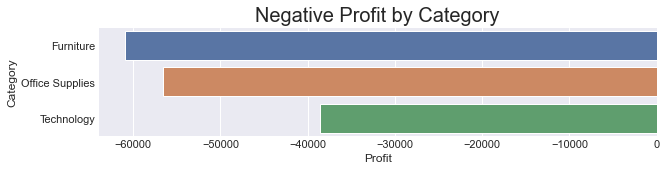

In [31]:
plt.subplots(figsize=(10,2))
sns.barplot(y=by_cat.Category,x=by_cat.Profit)
plt.title("Negative Profit by Category",size=20)
plt.show()

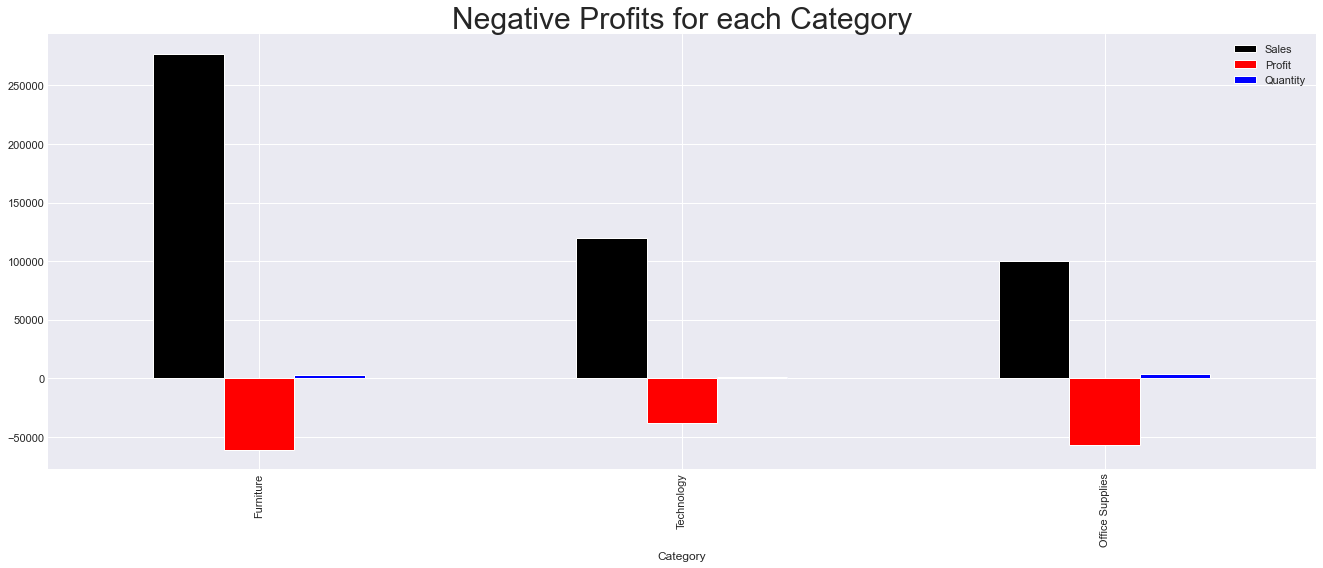

In [32]:
#Negative Profits for each Category
fig=plt.figure(figsize=(50,8))
ax1=fig.add_subplot(121)
Negative_profits.groupby("Category")[["Sales","Profit","Quantity"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black","red","blue"],ax=ax1)
ax1.set_title("Negative Profits for each Category",size=30)
plt.show()

**From the above two bar plots, we observe that sales which are maximum nearly 276K is causing the most negative profits nearly -60K**

In [33]:
#Negative Profit by City
by_city=Negative_profits.groupby('City').sum().sort_values(by='Profit').reset_index()
by_city.head()

,City,Sales,Quantity,Discount,Profit
0,Philadelphia,72620.3450,910,116.30,-19590.7411
1,Houston,38565.3744,691,104.74,-14785.3668
2,Chicago,20633.6220,547,88.00,-11114.3901
3,San Antonio,17952.7300,144,17.40,-7831.0254
4,Lancaster,7870.0280,72,9.70,-7632.4946


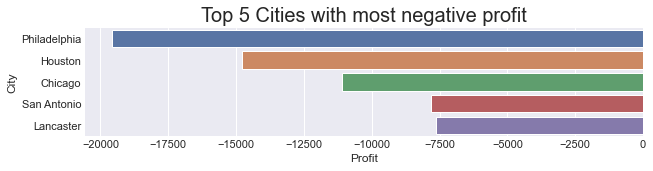

In [34]:
#Top 5 Cities with most negative profit
plt.subplots(figsize=(10,2))
sns.barplot(y=by_city.head().City,x=by_city.head().Profit)
plt.title("Top 5 Cities with most negative profit",size=20)
plt.show()

## Insights Drawn from Analysing the SampleSuperstore data
1) The profits for the Category Office Supplies is high, but the sales of the Category Office Supplies is less. So, we should focus on increasing the sales for Office Supplies.
2) The profits for the sub-category Tables and Bookcases are very less but the profit for sub-category Copiers is very high. So, we should focus on increasing the sales of the copiers.
3) The maximum profit is for Segment consumer for maximum sales hence growth must be increased in this segment
4) The ship Mode which is Maximum use by customers are Same day and they are doing maximum sales but do not making any much profit. So we receive maximum profit and sales with Standard class ship mode and hence this mode should be used highly.
5) The maximum sales is more than 700K for the West region and Profit is maximum in this region so we continue to grow the sales in west region. The minimum profit is present in the Central region where sales is comparatively higher than the south region that has more profit that the central region. Hence sales must be increased in south region as compared to central region for maximum profit.
6) States with maximum sales have minimum profits with few giving rise to negative profits, hence more focus should be put on increasing the sales in the states where sales is minimum in the current scenario, to gain more profit.
7) States with maximum sales have minimum profits with few giving rise to negative profits, hence more focus should be put on increasing the sales in the states where sales is minimum in the current scenario, to gain more profit.
8) The states with high Sales are generating less profit due to high discount allowance. Discount is negtively related to the Profit. This is be noted when a discount is being allowed on the products.